In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.naive_bayes import GaussianNB
from nltk.stem.snowball import PorterStemmer

In [0]:
data=pd.read_csv('mpst_full_data.csv')

In [0]:
print(data.shape)

(14828, 6)


In [0]:
data['tags']=data['tags'].apply(lambda x: x.replace(' ',''))

In [0]:
data['tags'].describe()

count      14828
unique      5604
top       murder
freq        1004
Name: tags, dtype: object

In [0]:
data.head(5)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult,horror,gothic,murder,atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring,romantic,stupid,feel-good",train,imdb
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty,murder,dramatic,cult,violence,atmosphe...",val,imdb


In [0]:
data['plot_synopsis'][1]
data['title'][1]

'Dungeons & Dragons: The Book of Vile Darkness'

In [0]:
plot1=data['split'].value_counts()
print(plot1)
print(type(plot1))

train    9489
test     2966
val      2373
Name: split, dtype: int64
<class 'pandas.core.series.Series'>


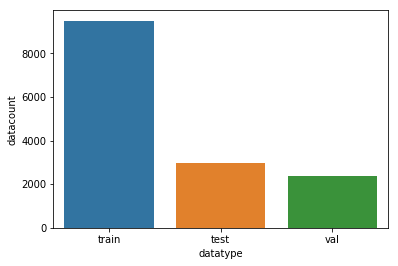

In [0]:
fig,ax=plt.subplots()
sns.barplot(x=plot1.index,y=plot1.values)
plt.xlabel('datatype')
plt.ylabel('datacount')
plt.show()

In [0]:
plot2=data['synopsis_source'].value_counts()
print(plot2)

wikipedia    10656
imdb          4172
Name: synopsis_source, dtype: int64


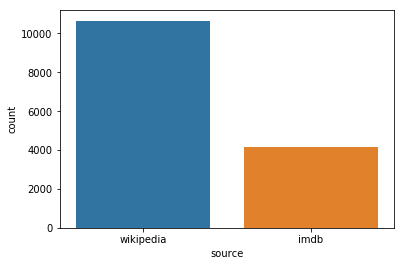

In [0]:
sns.barplot(x=plot2.index,y=plot2.values)
plt.xlabel('source')
plt.ylabel('count')
plt.show()

In [0]:
data['number_of_tags']=data['tags'].apply(lambda x : len(x.split(',')))
data.head(5)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,number_of_tags
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult,horror,gothic,murder,atmospheric",train,imdb,5
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring,romantic,stupid,feel-good",train,imdb,4
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty,murder,dramatic,cult,violence,atmosphe...",val,imdb,10


In [0]:
data['moviedata']=data['title']+' '+data['plot_synopsis']

In [0]:
data=data.drop_duplicates(subset={'plot_synopsis','title'},keep='first')

In [0]:
data.head(5)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,number_of_tags,moviedata
0,tt0057603,I tre volti della paura,Note: this synopsis is for the orginal Italian...,"cult,horror,gothic,murder,atmospheric",train,imdb,5,I tre volti della paura Note: this synopsis is...
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,"Two thousand years ago, Nhagruul the Foul, a s...",violence,train,imdb,1,Dungeons & Dragons: The Book of Vile Darkness ...
2,tt0033045,The Shop Around the Corner,"Matuschek's, a gift store in Budapest, is the ...",romantic,test,imdb,1,"The Shop Around the Corner Matuschek's, a gift..."
3,tt0113862,Mr. Holland's Opus,"Glenn Holland, not a morning person by anyone'...","inspiring,romantic,stupid,feel-good",train,imdb,4,"Mr. Holland's Opus Glenn Holland, not a mornin..."
4,tt0086250,Scarface,"In May 1980, a Cuban man named Tony Montana (A...","cruelty,murder,dramatic,cult,violence,atmosphe...",val,imdb,10,"Scarface In May 1980, a Cuban man named Tony M..."


In [0]:
data.shape

(14177, 8)

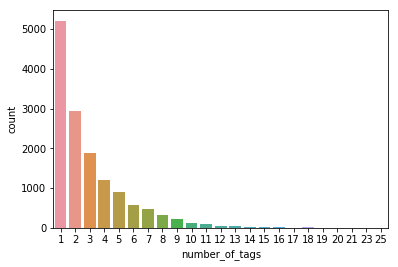

In [0]:
sns.countplot(data['number_of_tags'])

In [0]:
#number of times each tag appeared
countvect=CountVectorizer(tokenizer=lambda x:x.split(','))
counts=countvect.fit_transform(data['tags'])

In [0]:
counts1=counts.sum(axis=0).A1
#print(counts1)
#print(countvect.get_feature_names())
features=countvect.get_feature_names()
aq=counts1.argsort()[::-1]
#print(aq)
tags=[features[i] for i in aq]
#print(tags)
counts=sorted(counts1)[::-1]

In [0]:
#number of unique features
print(len(set(features)))

71


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

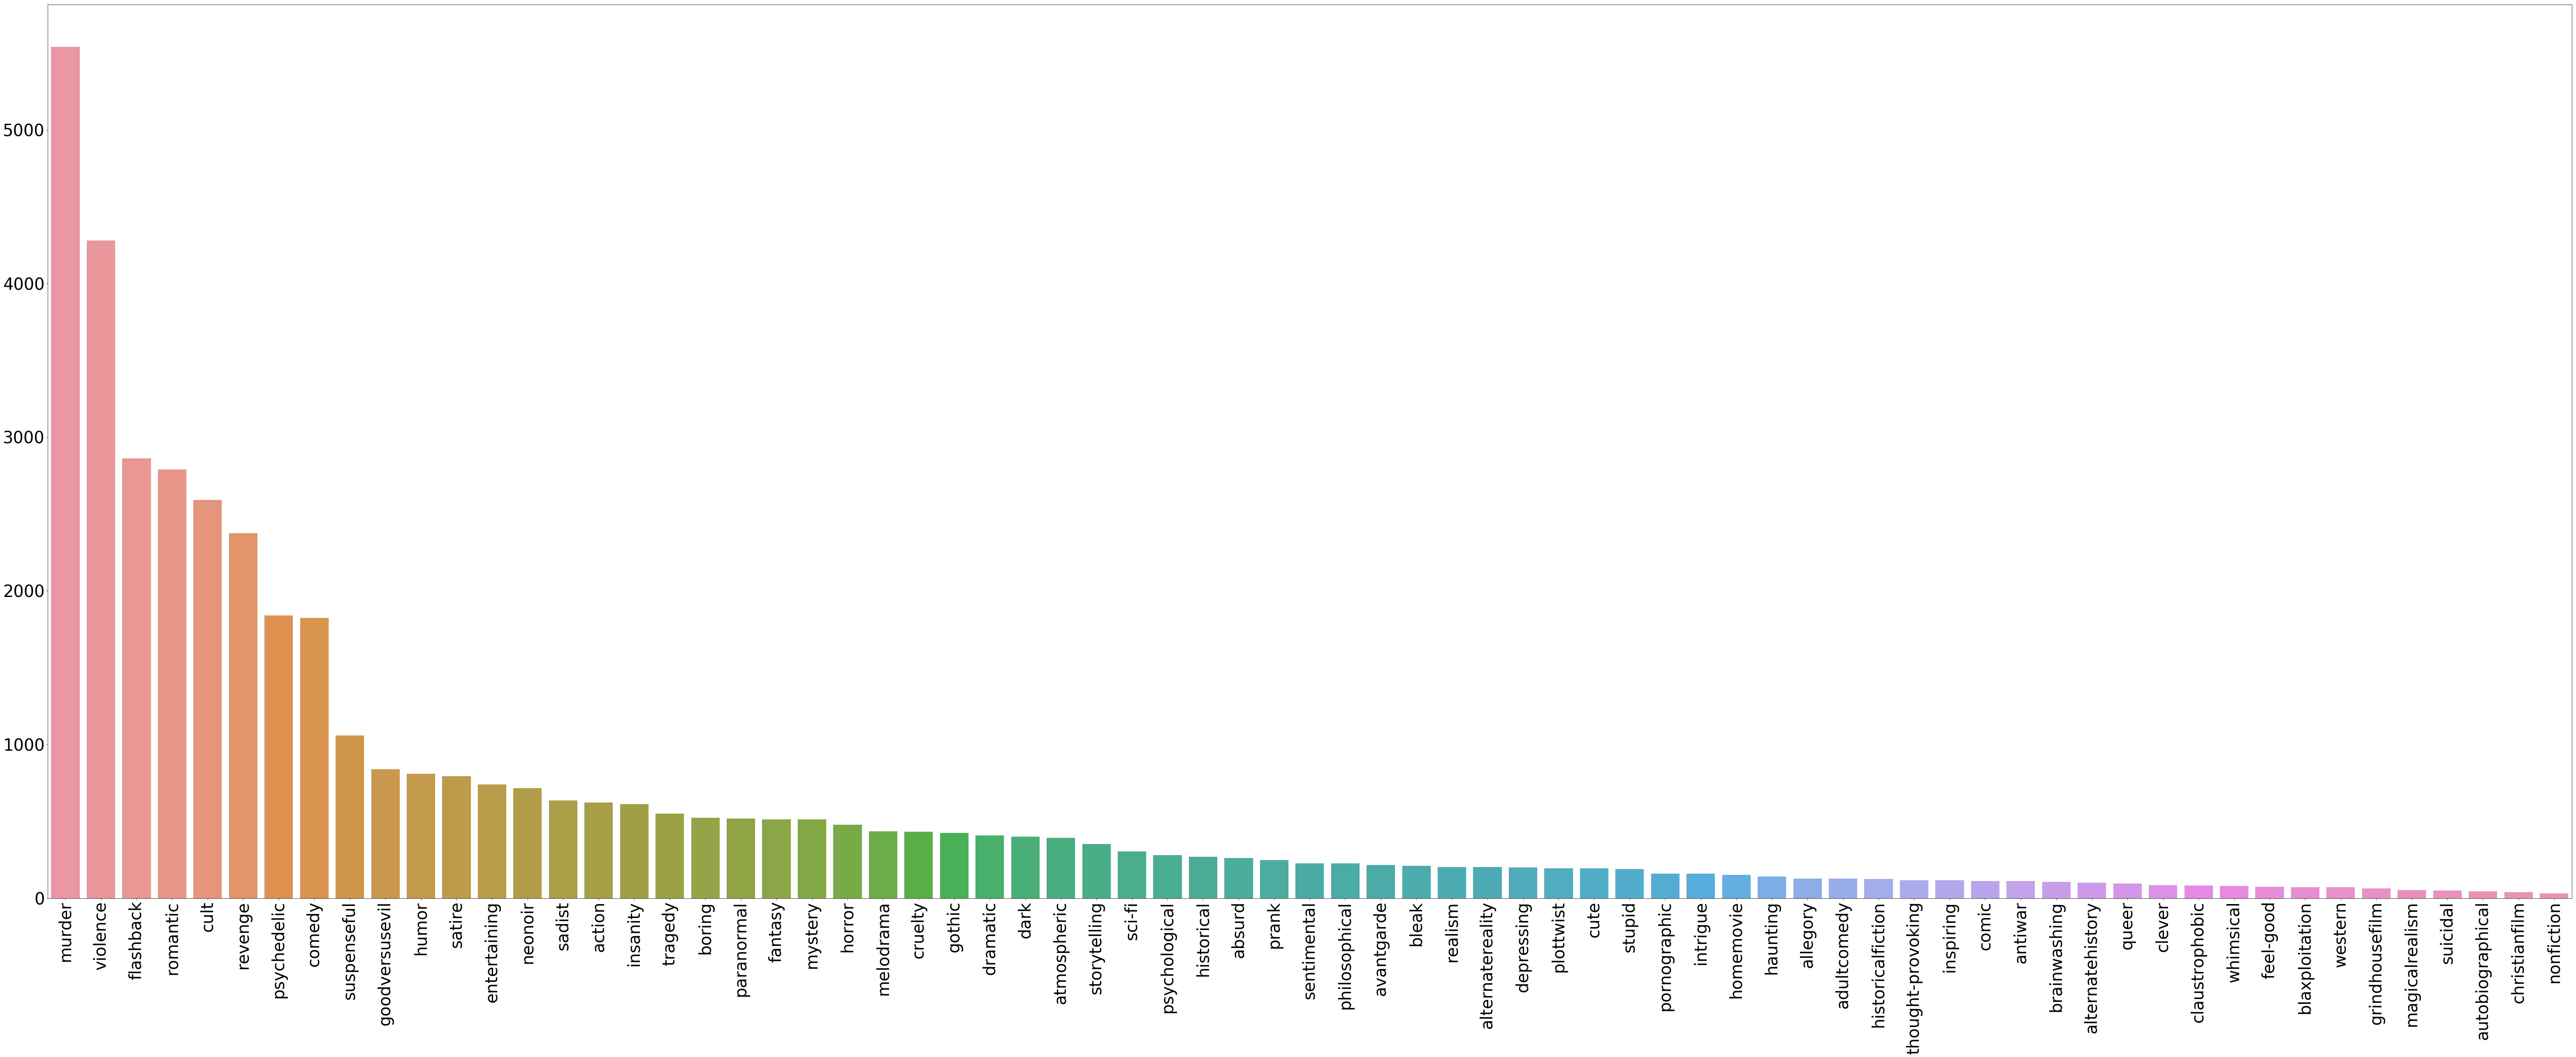

In [0]:
%matplotlib inline
fig=plt.figure(figsize=(110,40))
sns.barplot(tags,counts)
plt.xticks(rotation=90,fontsize=40)
plt.yticks(fontsize=40)

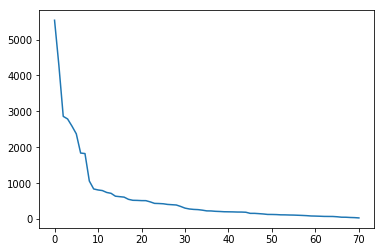

In [0]:
plt.plot(counts)

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text yticklabel objects>)

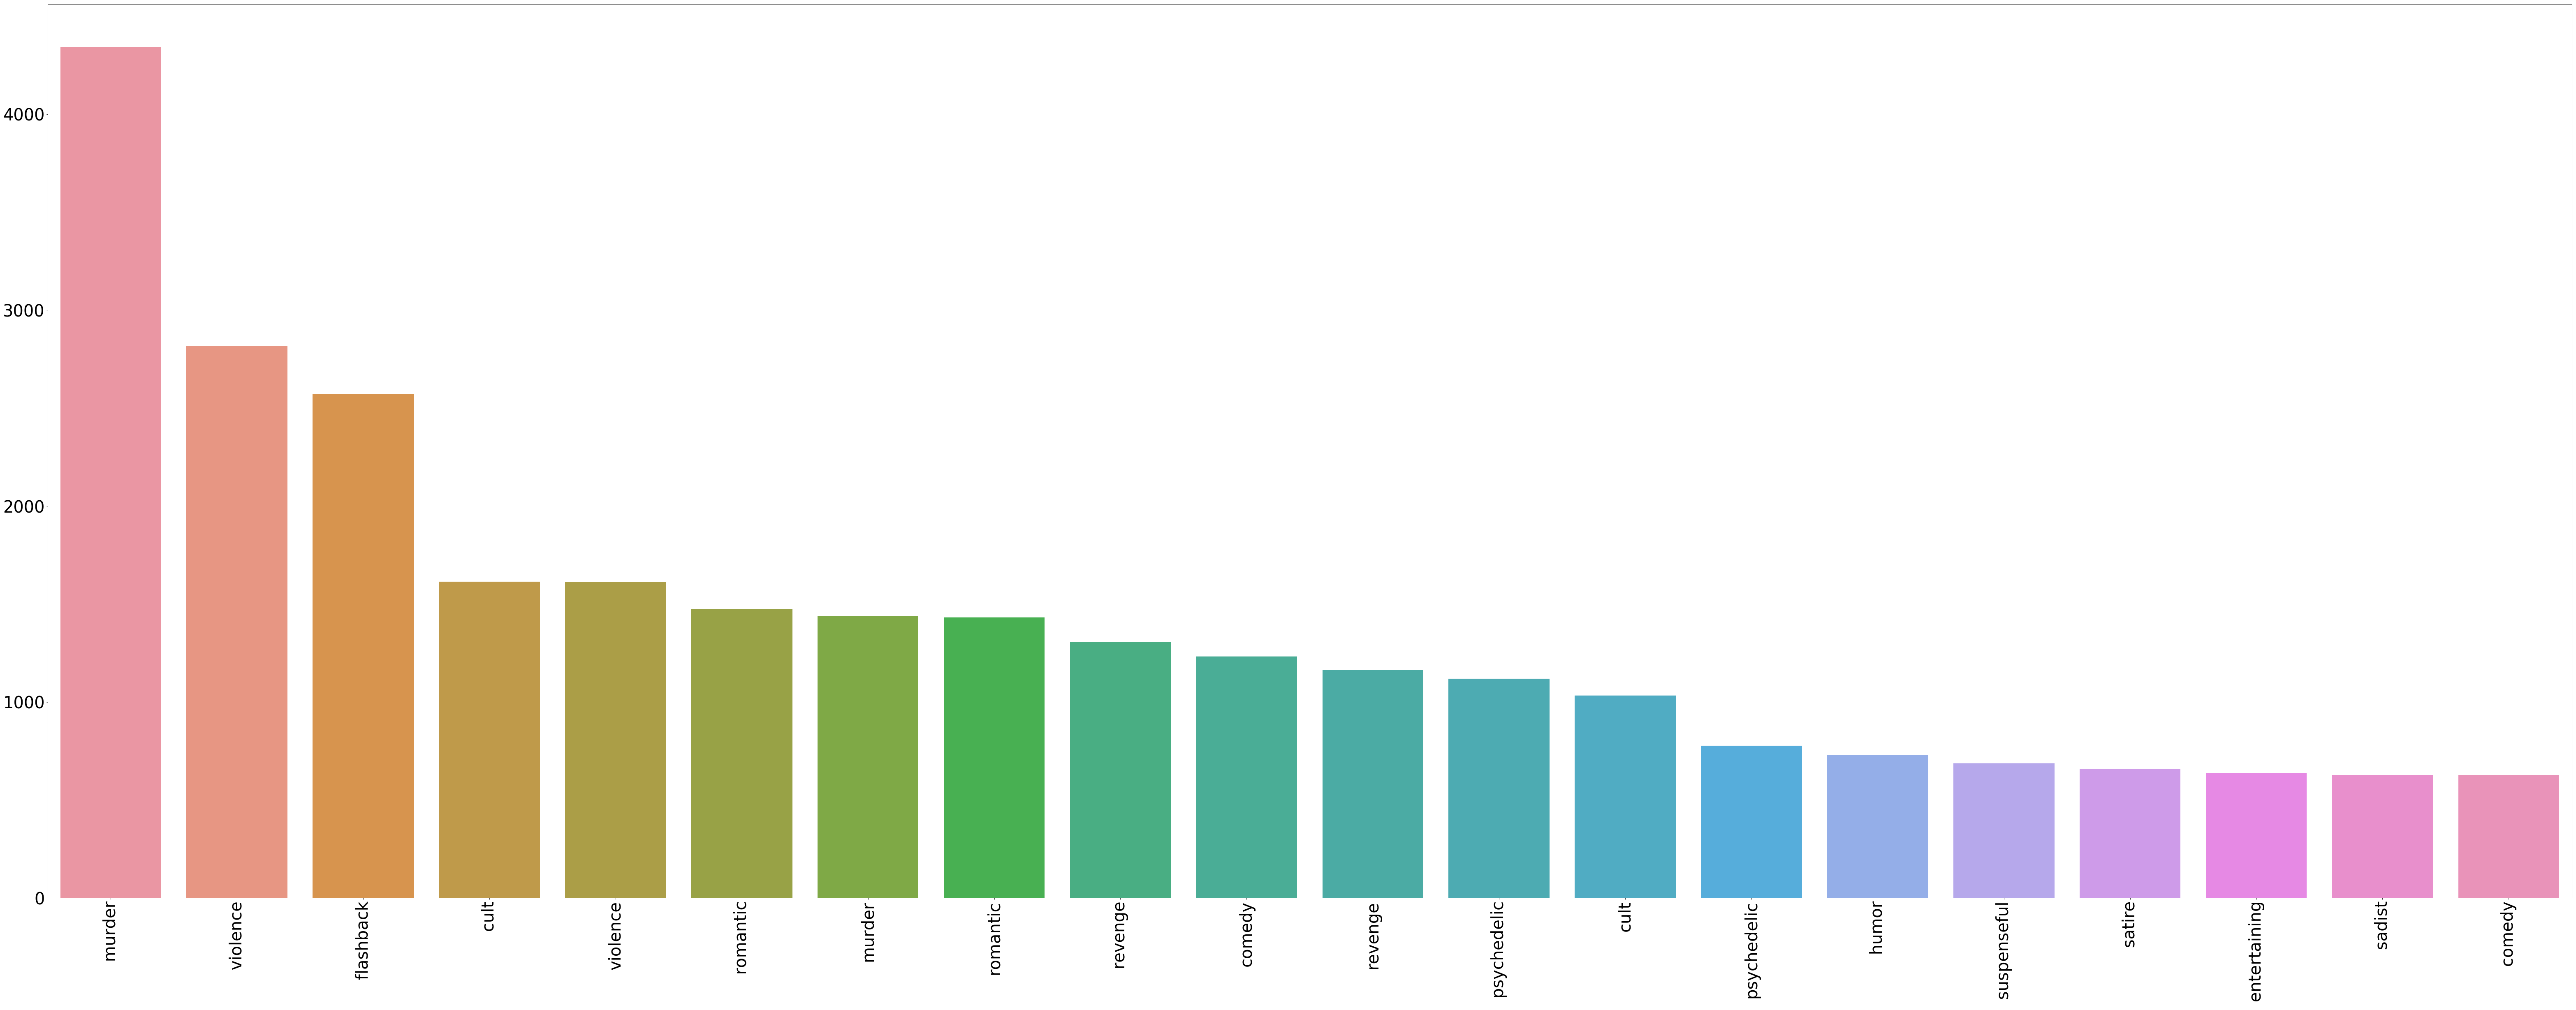

In [0]:
%matplotlib inline
fig=plt.figure(figsize=(110,40))
sns.barplot(tags[:20],counts[:20])
plt.xticks(rotation=90,fontsize=40)
plt.yticks(fontsize=40)

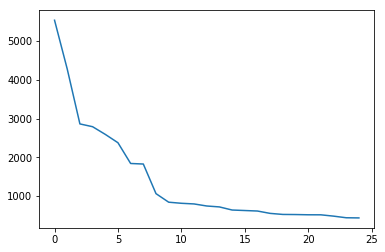

In [0]:
plt.plot(counts[:25])

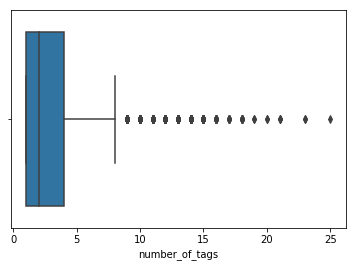

In [0]:
sns.boxplot(data['number_of_tags'])

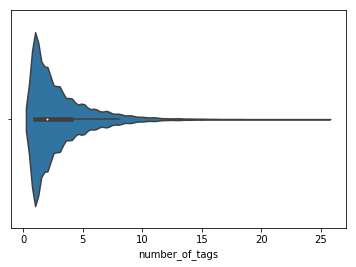

In [0]:
#very few numbr of questions are containing 25 tags.
sns.violinplot(data['number_of_tags'])

In [0]:
import re
def decontracted(phrase):
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    return phrase

In [0]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven','not','no', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [0]:
# Combining all the above stundents 
from bs4 import BeautifulSoup
plotsentences=[]
from tqdm import tqdm
synopsissentences = []
# tqdm is for printing the status bar
for sentance in tqdm(data['plot_synopsis'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    plotsentences.append(sentance.strip())

100%|███████████████████████████████████████████████████████████████████████████| 14177/14177 [00:53<00:00, 265.21it/s]


In [0]:
data['plot_synopsis']=plotsentences

In [0]:
data['plot_synopsis'].head(5)

0    note synopsis orginal italian release segments...
1    two thousand years ago nhagruul foul sorcerer ...
2    matuschek gift store budapest workplace alfred...
3    glenn holland morning person anyone standards ...
4    may cuban man named tony montana al pacino cla...
Name: plot_synopsis, dtype: object

In [0]:
from sklearn.model_selection import train_test_split
xtrainfinal,xtestfinal,ytrainfinal,ytestfinal=train_test_split(data['plot_synopsis'],data['tags'],test_size=0.2)

In [0]:
print(xtrainfinal.shape)
print(xtestfinal.shape)
print(ytrainfinal.shape)
print(ytestfinal.shape)

(11341,)
(2836,)
(11341,)
(2836,)


In [0]:
countvect=CountVectorizer(max_df=0.8,max_features=20000)
xtrain=countvect.fit_transform(xtrainfinal)
xtest=countvect.transform(xtestfinal)

In [0]:
countvect1=CountVectorizer(tokenizer=lambda x:x.split(','))
ytrain=countvect1.fit_transform(ytrainfinal)
ytest=countvect1.transform(ytestfinal)

In [0]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(11341, 20000)
(2836, 20000)
(11341, 71)
(2836, 71)


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.01}


In [0]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
mod=SGDClassifier(loss='log',alpha=0.01)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty1=mod1.predict_proba(xtest)
predcity= (predicty1>= 0.2).astype(int)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3082221896526455
macro f1_score 0.10444158411347086
hamming_loss 0.04688213909692286
precision_score 0.4141394249704608
recall_score 0.24544817927170867


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.01}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='hinge',alpha=0.01)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.30789010691568547
macro f1_score 0.11713357275270946
hamming_loss 0.050795605792725324
precision_score 0.3663446054750403
recall_score 0.26552287581699346


In [0]:
bigramvect=CountVectorizer(max_df=0.8,max_features=20000,ngram_range=(2,2))
xtrainbigram=bigramvect.fit_transform(xtrainfinal)
xtestbigram=bigramvect.transform(xtestfinal)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrainbigram,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.001}


In [0]:
mod=SGDClassifier(alpha=0.001,loss='hinge')
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)

print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))
print('--------------------------------------------------------------------')

micro f1-score 0.29509383863375777
macro f1_score 0.13298824937622872
hamming_loss 0.058011680804147876
precision_score 0.3055104335874047
recall_score 0.2853641456582633
--------------------------------------------------------------------


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrainbigram,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.001}


In [0]:
mod=SGDClassifier(alpha=0.001,loss='log')
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))
print('--------------------------------------------------------------------')

micro f1-score 0.2985179134087992
macro f1_score 0.12436890048527703
hamming_loss 0.05970519875245833
precision_score 0.29848308051341893
recall_score 0.29855275443510737
--------------------------------------------------------------------


In [0]:
trigramvect=CountVectorizer(max_df=0.8,ngram_range=(3,3),max_features=20000)
xtraintrigram=bigramvect.fit_transform(xtrainfinal)
xtesttrigram=bigramvect.transform(xtestfinal)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtraintrigram,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.001}


In [0]:
mod=SGDClassifier(alpha=0.001,loss='log')
mod1=OneVsRestClassifier(mod)
mod1.fit(xtraintrigram,ytrain)
predicty=mod1.predict(xtesttrigram)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))
print('--------------------------------------------------------------------')

micro f1-score 0.2354886113152094
macro f1_score 0.050654984709496254
hamming_loss 0.0413397167206341
precision_score 0.5525862068965517
recall_score 0.1496265172735761
--------------------------------------------------------------------


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge',random_state=42))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtraintrigram,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.001}


In [0]:
mod=SGDClassifier(alpha=0.001,loss='hinge',random_state=42)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtraintrigram,ytrain)
predicty=mod1.predict(xtesttrigram)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))
print('--------------------------------------------------------------------')

micro f1-score 0.27408543971573934
macro f1_score 0.08104879637749375
hamming_loss 0.0446423250362542
precision_score 0.4448230668414155
recall_score 0.198062558356676
--------------------------------------------------------------------


In [0]:
countvect=CountVectorizer(max_df=0.8,max_features=20000,ngram_range=(1,2))
xtrain=countvect.fit_transform(xtrainfinal)
xtest=countvect.transform(xtestfinal)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.01}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='hinge',alpha=0.01)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.30802369413031777
macro f1_score 0.1182253783712013
hamming_loss 0.05105385486402193
precision_score 0.3638676844783715
recall_score 0.26704014939309056


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.01}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='log',alpha=0.01)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.29274558853356775
macro f1_score 0.11842655299923104
hamming_loss 0.051952760285265895
precision_score 0.3479029407038406
recall_score 0.2526844070961718


# ==----------------------------------------------------------------------------------------------------==

In [0]:
countvect=CountVectorizer(max_df=0.8,ngram_range=(1,3),max_features=20000)
xtrain=countvect.fit_transform(xtrainfinal)
xtest=countvect.transform(xtestfinal)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge',random_state=42))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrainngram1,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.001}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='hinge',alpha=0.001)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.30420112471055244
macro f1_score 0.11352162976535947
hamming_loss 0.05223087466973917
precision_score 0.3511531999389033
recall_score 0.2683239962651727


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.001}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='log',alpha=0.001)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.2987630827783064
macro f1_score 0.11922760515809862
hamming_loss 0.058562943244800256
precision_score 0.30455868089233756
recall_score 0.2931839402427638


# --------------------------------------------------

In [0]:
countvect1=CountVectorizer(tokenizer=lambda x:x.split(','))
ytrain=countvect1.fit_transform(ytrainfinal)
ytest=countvect1.transform(ytestfinal)

In [0]:
tfvect=TfidfVectorizer(max_features=10000)
xtrain=tfvect.fit_transform(xtrainfinal)
xtest=tfvect.transform(xtestfinal)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='log',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.30861563083488935
macro f1_score 0.06255659907280768
hamming_loss 0.18279266572637518
precision_score 0.27197931358721206
recall_score 0.3566584463625154


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge',random_state=42))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='hinge',alpha=100)

mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)

print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.32315284075753536
macro f1_score 0.06543862422120973
hamming_loss 0.17894922425952045
precision_score 0.28479078514339445
recall_score 0.37345869297163997


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect=TfidfVectorizer(min_df=3,ngram_range=(2,2),max_features=20000)
xtraintfidf=tfidfvect.fit_transform(xtrainfinal)
xtesttfidf=tfidfvect.transform(xtestfinal)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtraintfidf,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='hinge',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtraintfidf,ytrain)
predicty=mod1.predict(xtesttfidf)

print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3129475517708535
macro f1_score 0.09028425581142945
hamming_loss 0.25035260930888575
precision_score 0.22806770098730605
recall_score 0.49845869297163997


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtraintfidf,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 1000}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='log',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtraintfidf,ytrain)
predicty=mod1.predict(xtesttfidf)

print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3050544588155208
macro f1_score 0.10041687150463537
hamming_loss 0.2879760225669958
precision_score 0.21068406205923837
recall_score 0.5525585696670777


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect=TfidfVectorizer(min_df=3,ngram_range=(3,3),max_features=20000)
xtraintfidf=tfidfvect.fit_transform(xtrainfinal)
xtesttfidf=tfidfvect.transform(xtestfinal)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtraintfidf,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='log',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtraintfidf,ytrain)
predicty=mod1.predict(xtesttfidf)

print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3196051735874745
macro f1_score 0.10534718518321413
hamming_loss 0.28194640338504934
precision_score 0.22073342736248236
recall_score 0.5789149198520345


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(xtraintfidf,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='hinge',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtraintfidf,ytrain)
predicty=mod1.predict(xtesttfidf)

print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.30861563083488935
macro f1_score 0.06255659907280768
hamming_loss 0.18279266572637518
precision_score 0.27197931358721206
recall_score 0.3566584463625154


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,2),max_features=10000,max_df=0.8)
trainngram=tf.fit_transform(xtrainfinal)
testngram=tf.transform(xtestfinal)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(trainngram,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='hinge',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(trainngram,ytrain)
predicty=mod1.predict(testngram)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3428488484613895
macro f1_score 0.09841767380104982
hamming_loss 0.23945698166431595
precision_score 0.2498589562764457
recall_score 0.5460850801479655


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(trainngram,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='log',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(trainngram,ytrain)
predicty=mod1.predict(testngram)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.2602090187729824
macro f1_score 0.07650037956280258
hamming_loss 0.2695698166431594
precision_score 0.1896332863187588
recall_score 0.41445745992601724


# ==----------------------------------------------------------------------------------------------==

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,3),max_features=10000,max_df=0.8)
trainngram1=tf.fit_transform(xtrainfinal)
testngram1=tf.transform(xtestfinal)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(trainngram,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 1000}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='hinge',alpha=1000)
mod1=OneVsRestClassifier(mod)
mod1.fit(trainngram,ytrain)
predicty=mod1.predict(testngram)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3149394347240915
macro f1_score 0.07739143390764251
hamming_loss 0.2153737658674189
precision_score 0.24753173483779972
recall_score 0.43279901356350187


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(trainngram,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 1000}


In [0]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(loss='log',alpha=1000)
mod1=OneVsRestClassifier(mod)
mod1.fit(trainngram,ytrain)
predicty=mod1.predict(testngram)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3084962260499323
macro f1_score 0.08866093371435395
hamming_loss 0.25197461212976024
precision_score 0.22482369534555713
recall_score 0.4913686806411837


# ANALYSIS ON TAGS...

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer(tokenizer=lambda x: x.split(','))
multilabely=vec.fit_transform(data['tags'])

In [0]:
multilabely.shape

(14177, 71)

In [0]:
t=multilabely.sum(axis=0).tolist()[0]
sortedtags=sorted(range(len(t)),key=lambda i :t[i],reverse=True)
multilabely1=multilabely[:,sortedtags[:70]]

In [0]:
x=multilabely1.sum(axis=1)
y=np.where(x==0)[0]
print(data.shape)
print(len(y))

(14177, 8)
29


In [0]:
def numberoftags(n):
    t1=multilabely.sum(axis=0).tolist()[0]
    sortedtags=sorted(range(len(t)),key=lambda i :t[i],reverse=True)
    multilabelyq=multilabely[:,sortedtags[:n]]
    return multilabelyq

In [0]:
def numberofpointscovered(n1):
    multilabelyq=numberoftags(n1)
    x=multilabelyq.sum(axis=1)
    y=np.where(x!=0)[0]
    #print(y)
    return len(y)
    

In [0]:
multilabelyq=numberoftags(20)
x=multilabelyq.sum(axis=1)
y=np.where(x!=0)[0]
print(len(y))

12970


[0, 12213, 12970, 13406, 13699, 13899, 14060]


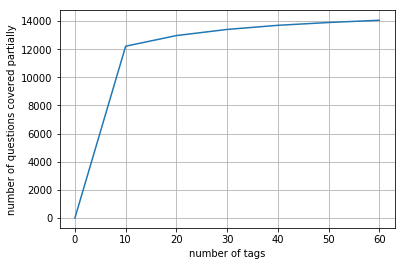

In [0]:
numberofpointscovered1=[]
c=[]
for i in range(0,70,10):
    c.append(i)
    numberofpointscovered1.append(numberofpointscovered(i))
print(numberofpointscovered1)
fig,ax=plt.subplots()
ax.plot(c,numberofpointscovered1)
plt.xlabel('number of tags')
plt.ylabel('number of questions covered partially')
plt.grid()
plt.show()

In [0]:
listofsent=[]
for sent in xtrainfinal:
    listofsent.append(sent.split(' '))

In [0]:
from gensim.models import Word2Vec
model=Word2Vec(listofsent,min_count=5,size=50,workers=-1)


In [0]:
word2vecwords=list(model.wv.vocab)

In [0]:
sentencevectors=[]
for sent in tqdm(xtrainfinal):
    sentvec=np.zeros(50)
    countwords=0
    for word in sent.split(' '):
        if word in word2vecwords:
            vec=model.wv[word]
            sentvec+=vec
            countwords+=1
    if countwords!=0:
        sentvec/=countwords
    sentencevectors.append(sentvec)
        

100%|████████████████████████████████████████████████████████████████████████████| 11341/11341 [28:58<00:00,  5.69it/s]


In [0]:
print(len(sentencevectors))
print(len(sentencevectors[0]))

11341
50


In [0]:
sentencevectorstest=[]
for sent in tqdm(xtestfinal):
    sentvec1=np.zeros(50)
    countwordstest=0
    for word in sent.split(' '):
        if word in word2vecwords:
            vec=model.wv[word]
            sentvec1+=vec
            countwordstest+=1
    if countwordstest!=0:
        sentvec1/=countwordstest
    sentencevectorstest.append(sentvec1)

100%|██████████████████████████████████████████████████████████████████████████████| 2836/2836 [09:25<00:00,  5.80it/s]


In [0]:
countvect1=CountVectorizer(tokenizer=lambda x:x.split(','))
ytrain=countvect1.fit_transform(ytrainfinal)
ytest=countvect1.transform(ytestfinal)

In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(sentencevectors,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 1000}


In [0]:
from sklearn import metrics
mod=SGDClassifier(alpha=100,loss='hinge')
mod1=OneVsRestClassifier(mod)
mod1.fit(sentencevectors,ytrain)
predicty=mod1.predict(sentencevectorstest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3400980659220921
macro f1_score 0.07916475394733535
hamming_loss 0.2009873060648801
precision_score 0.29348848142924305
recall_score 0.40430699481865284


In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(sentencevectors,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn import metrics
mod=SGDClassifier(alpha=100,loss='log')
mod1=OneVsRestClassifier(mod)
mod1.fit(sentencevectors,ytrain)
predicty=mod1.predict(sentencevectorstest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3315172977390357
macro f1_score 0.0773164992305504
hamming_loss 0.20360076329544513
precision_score 0.2860836859426422
recall_score 0.3941062176165803


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
traintfidf=tfidf.fit_transform(xtrainfinal)
features=tfidf.get_feature_names()
dictionary=dict(zip(features,tfidf.idf_))

In [ ]:
sentencevectorstfidf=[]
for sent in tqdm(xtrainfinal):
    countwordss=0
    vec=np.zeros(50)
    for word in sent.split(' ') :
        
        if word in word2vecwords and word in features:
            w2v=model.wv[word]
            tfidfvalue=dictionary[word]*(sent.count(word)/len(sent))
            outvec=w2v*tfidfvalue
            vec+=outvec
            countwordss+=1
    if countwordss!=0:
        vec/=countwordss
    sentencevectorstfidf.append(vec)            
        

In [ ]:
sentencevectorstfidftest=[]
for sent in tqdm(xtestfinal):
    countwordss=0
    vec=np.zeros(50)
    for word in sent.split(' ') :
        
        if word in word2vecwords and word in features:
            w2v=model.wv[word]
            tfidfvalue=dictionary[word]*(sent.count(word)/len(sent))
            outvec=w2v*tfidfvalue
            vec+=outvec
            countwordss+=1
    if countwordss!=0:
        vec/=countwordss
    sentencevectorstfidftest.append(vec)            
        

In [0]:
countvect1=CountVectorizer(tokenizer=lambda x:x.split(','))
ytrain=countvect1.fit_transform(ytrainfinal)
ytest=countvect1.transform(ytestfinal)

In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='hinge',random_state=42))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(sentencevectorstfidf,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn import metrics
mod=SGDClassifier(alpha=100,loss='hinge')
mod1=OneVsRestClassifier(mod)
mod1.fit(sentencevectorstfidf,ytrain)
predicty=mod1.predict(sentencevectorstfidftest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.35564159292035397
macro f1_score 0.10120757877274977
hamming_loss 0.24647390691114246
precision_score 0.3400916784203103
recall_score 0.37268160741885625


In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(sentencevectorstfidf,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn import metrics
mod=SGDClassifier(alpha=100,loss='log')
mod1=OneVsRestClassifier(mod)
mod1.fit(sentencevectorstfidf,ytrain)
predicty=mod1.predict(sentencevectorstfidftest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3465592064476131
macro f1_score 0.1868933621691792
hamming_loss 0.4459802538787024
precision_score 0.23653032440056418
recall_score 0.6479907264296755


# --------------------------------------------------------------------------------------------------------------------------------------------------

# FEATURE ENGINEERING (MERGING FEATURES OF TITLE AND PLOT_SYNOPSIS)

In [0]:
# Combining all the above stundents 
from bs4 import BeautifulSoup
plotsentences=[]
from tqdm import tqdm
textsentences = []
# tqdm is for printing the status bar
for sentance in tqdm(data['moviedata'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    # https://gist.github.com/sebleier/554280
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)
    textsentences.append(sentance.strip())

100%|███████████████████████████████████████████████████████████████████████████| 14177/14177 [00:18<00:00, 748.78it/s]


In [0]:
data['moviedata']=textsentences
data['tags'].head(5)

0            cult, horror, gothic, murder, atmospheric
1                                             violence
2                                             romantic
3               inspiring, romantic, stupid, feel-good
4    cruelty, murder, dramatic, cult, violence, atm...
Name: tags, dtype: object

In [0]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(textsentences,data['tags'],test_size=0.2)

In [0]:
countvect1=CountVectorizer(tokenizer=lambda x:x.split(','))
ytrain=countvect1.fit_transform(ytr)
ytest=countvect1.transform(yte)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
ra=CountVectorizer(min_df=3,ngram_range=(1,3),max_features=25000)
ngramtr=ra.fit_transform(xtr)
ngramte=ra.transform(xte)

In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='hinge',random_state=42))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(ngramtr,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.001}


In [0]:
from sklearn import metrics
mod=SGDClassifier(alpha=0.001,loss='hinge')
mod1=OneVsRestClassifier(mod)
mod1.fit(ngramtr,ytrain)
predicty=mod1.predict(ngramte)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.2946695535622229
macro f1_score 0.23909081000145366
hamming_loss 0.19297602256699578
precision_score 0.28648757016840415
recall_score 0.30333262576947567


In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(ngramtr,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.01}


In [0]:
from sklearn import metrics
mod=SGDClassifier(alpha=0.01,loss='log')
mod1=OneVsRestClassifier(mod)
mod1.fit(ngramtr,ytrain)
predicty=mod1.predict(ngramte)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.2957572767636902
macro f1_score 0.22483701711167914
hamming_loss 0.1610719322990127
precision_score 0.3529584927877539
recall_score 0.2545107195924432


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
ngramtf=TfidfVectorizer(min_df=6,ngram_range=(1,3),max_features=30000)
ngramtrtfidf=ngramtf.fit_transform(xtr)
ngramtetfidf=ngramtf.transform(xte)

In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(ngramtrtfidf,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 1000}


In [0]:
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
mod=SGDClassifier(alpha=1000,loss='hinge',class_weight='balanced')
mod1=OneVsRestClassifier(mod)
mod1.fit(ngramtr,ytrain)
predicty=mod1.predict(ngramte)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.29800929789009417
macro f1_score 0.22981753785566675
hamming_loss 0.1661212976022567
precision_score 0.33985861881457313
recall_score 0.26533644661430694


In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(ngramtrtfidf,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn import metrics
mod=SGDClassifier(alpha=100,loss='log',class_weight='balanced')
mod1=OneVsRestClassifier(mod)
mod1.fit(ngramtr,ytrain)
predicty=mod1.predict(ngramte)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.29621408311752373
macro f1_score 0.23087571681441726
hamming_loss 0.16098730606488013
precision_score 0.35344320188346084
recall_score 0.2549352579070261


In [0]:

s=[['bow','bow','tfidf','tfidf'],['ngram','ngram','ngram','ngram'],['svm','log.reg.','svm','log.reg.'],['0.01','0.01','1000','100'],['0.294','0.295','0.298','0.296'],['0.24','0.224','0.229','0.23'],['0.2','0.161','0.166','0.16'],['0.28','0.35','0.339','0.35'],['0.30','0.2545','0.265','0.254']]
s1=np.array(s)
s2=s1.T
x=pd.DataFrame(s2,columns=['encoding','ngram','model','alpha','microf1','macrof1','ham-loss','precision','recall'])
x

,encoding,ngram,model,alpha,microf1,macrof1,ham-loss,precision,recall
0,bow,ngram,svm,0.01,0.294,0.24,0.2,0.28,0.30
1,bow,ngram,log.reg.,0.01,0.295,0.224,0.161,0.35,0.2545
2,tfidf,ngram,svm,1000,0.298,0.229,0.166,0.339,0.265
3,tfidf,ngram,log.reg.,100,0.296,0.23,0.16,0.35,0.254


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# NLTK PARTS OF SPEECH

In [0]:
import nltk

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\uib25207\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
tokens=nltk.word_tokenize('can you please buy me tea')
print('parts of sppech',nltk.pos_tag(tokens))

parts of sppech [('can', 'MD'), ('you', 'PRP'), ('please', 'VB'), ('buy', 'VB'), ('me', 'PRP'), ('tea', 'JJ')]


In [0]:
xtrainfinal.head(5)

13268    virginia lofton girl living older sister carol...
13456    maan singh honest prithvi singh engaged legal ...
13723    sunita asha parekh lives along widowed father ...
8734     global warming rendered earth barely inhabitab...
4322     entire movie takes place new york city except ...
Name: plot_synopsis, dtype: object

In [0]:
str1=' '
totalnewsynop=[]
for sentence in xtrainfinal:
    newsynop=[]
    for token, pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
        if pos.startswith('N'or'V'or'R'or'J'):
            if(len(token)>2):
                newsynop.append(token)
    str1=' '.join(newsynop)
    totalnewsynop.append(str1)
    
    

In [0]:
str1=' '
totalnewsynop1=[]
for sentence in xtestfinal:
    newsynop=[]
    for token, pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
        if pos.startswith('N'or'V'or'R'or'J'):
            if(len(token)>2):
                newsynop.append(token)
    str1=' '.join(newsynop)
    totalnewsynop1.append(str1)
    
    

In [0]:
xtrainfinal['final_synopsis']=totalnewsynop
xtestfinal['final_synopsis']=totalnewsynop1

In [0]:
countvect1=CountVectorizer(tokenizer=lambda x:x.split(','))
ytrain=countvect1.fit_transform(ytrainfinal)
ytest=countvect1.transform(ytestfinal)

In [0]:
from sklearn.feature_extraction.text  import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=10000,max_df=6)
xtrain=tfidf.fit_transform(xtrainfinal['final_synopsis'])
xtest=tfidf.transform(xtestfinal['final_synopsis'])

In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
mod=SGDClassifier(loss='log',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3658775190765017
macro f1_score 0.30468696106325177
hamming_loss 0.22856135401974612
precision_score 0.37059056678557273
recall_score 0.36128284389489956


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
ve=CountVectorizer(max_df=0.8, max_features=20000,tokenizer = lambda x: x.split(),ngram_range=(1,3))
xtrain=ve.fit_transform(xtrainfinal['final_synopsis'])
xtest=ve.transform(xtestfinal['final_synopsis'])

In [0]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler(with_mean=False)
xtrain=scale.fit_transform(xtrain)
xtest=scale.fit_transform(xtest)

In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.001}


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics
mod=SGDClassifier(loss='log',alpha=0.001)
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.3735749780765858
macro f1_score 0.30913306008426333
hamming_loss 0.2266925246826516
precision_score 0.3768429329663849
recall_score 0.3703632148377125


In [0]:
from sklearn.feature_extraction.text  import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=20000,max_df=0.8,ngram_range=(1,3))
xtrain=tfidf.fit_transform(xtrainfinal['final_synopsis'])
xtest=tfidf.transform(xtestfinal['final_synopsis'])

In [0]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler(with_mean=False)
xtrain=scale.fit_transform(xtrain)
xtest=scale.fit_transform(xtest)

In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.01}


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics
mod=SGDClassifier(alpha=0.01,loss='log')
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))

micro f1-score 0.35690736998830164
macro f1_score 0.2859534848255194
hamming_loss 0.2132228490832158
precision_score 0.3969718476460847
recall_score 0.32418856259659967


In [0]:
from sklearn.feature_extraction.text  import CountVectorizer
vc=CountVectorizer(max_features=20000,max_df=0.8,ngram_range=(1,3))
xtrain=vc.fit_transform(xtrainfinal['final_synopsis'])
xtest=vc.transform(xtestfinal['final_synopsis'])

In [0]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler(with_mean=False)
xtrain=scale.fit_transform(xtrain)
xtest=scale.fit_transform(xtest)

In [0]:
import warnings
from sklearn.linear_model import SGDClassifier
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
hyperparameter={"estimator__alpha":[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod=OneVsRestClassifier(SGDClassifier(loss='log',random_state=42))
mod1=RandomizedSearchCV(mod,hyperparameter,scoring='f1_micro')
mod1.fit(xtrain,ytrain)
print(mod1.best_params_)

{'estimator__alpha': 0.001}


In [0]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics
mod=SGDClassifier(alpha=0.001,loss='log')
mod1=OneVsRestClassifier(mod)
mod1.fit(xtrain,ytrain)
predicty=mod1.predict(xtest)
print('micro f1-score',metrics.f1_score(ytest,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest,predicty))
print('precision_score',metrics.precision_score(ytest,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest,predicty,average='micro'))


micro f1-score 0.3727930535455862
macro f1_score 0.30615913920255045
hamming_loss 0.22923131170662905
precision_score 0.37232607438812876
recall_score 0.3732612055641422


# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ doing google word2vec-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [0]:
data.head(5)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source
0,tt0057603,I tre volti della paura,note synopsis orginal italian release segments...,"cult, horror, gothic, murder, atmospheric",train,imdb
1,tt1733125,Dungeons & Dragons: The Book of Vile Darkness,two thousand years ago nhagruul foul sorcerer ...,violence,train,imdb
2,tt0033045,The Shop Around the Corner,matuschek gift store budapest workplace alfred...,romantic,test,imdb
3,tt0113862,Mr. Holland's Opus,glenn holland morning person anyone standards ...,"inspiring, romantic, stupid, feel-good",train,imdb
4,tt0086250,Scarface,may cuban man named tony montana al pacino cla...,"cruelty, murder, dramatic, cult, violence, atm...",val,imdb


In [0]:
from sklearn.model_selection import train_test_split
xtrainfinal,xtestfinal,ytrainfinal,ytestfinal=train_test_split(data['totalnewsynop'],data['tags'],test_size=0.2)

In [0]:
listofsent=[]
for sent in xtrainfinal:
    listofsent.append(sent.split(' '))

In [0]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
w2v_model=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
print(w2v_model.wv.most_similar('great'))
print(w2v_model.wv.most_similar('worst'))

c:\legacyapp\python36\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


[('terrific', 0.7989331483840942), ('fantastic', 0.7935211658477783), ('tremendous', 0.7748856544494629), ('wonderful', 0.7647868394851685), ('good', 0.7291510105133057), ('incredible', 0.7032873630523682), ('marvelous', 0.6971102952957153), ('phenomenal', 0.6841565370559692), ('amazing', 0.6634128093719482), ('awesome', 0.6510506868362427)]


c:\legacyapp\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


[('Worst', 0.6146092414855957), ('weakest', 0.6143776774406433), ('scariest', 0.5957258343696594), ('ugliest', 0.5931180715560913), ('best', 0.5835110545158386), ('bleakest', 0.5718506574630737), ('strongest', 0.567145586013794), ('nastiest', 0.5644308924674988), ('lousiest', 0.5631451606750488), ('toughest', 0.5624395608901978)]


In [0]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

c:\legacyapp\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


number of words that occured minimum 5 times  3000000
sample words  ['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are', 'I', 'have', 'he', 'will', 'has', '####', 'his', 'an', 'this', 'or', 'their', 'who', 'they', 'but', '$', 'had', 'year', 'were', 'we', 'more', '###', 'up', 'been', 'you', 'its', 'one', 'about', 'would', 'which', 'out']


In [0]:
import sys
import warnings
warnings.filterwarnings('ignore')
sentencevectors=[]
for sent in tqdm(xtrainfinal):
    sentvec=np.zeros(300)
    countwords=0
    for word in sent.split(' '):
        if word in w2v_words:
            vec=w2v_model.wv[word]
            sentvec+=vec
            countwords+=1
    if countwords!=0:
        sentvec/=countwords
    sentencevectors.append(sentvec)

In [0]:
sentencevectorstest=[]
for sent in tqdm(xtestfinal):
    sentvec1=np.zeros(300)
    countwordstest=0
    for word in sent.split(' '):
        if word in w2v_words:
            vec=w2v_model.wv[word]
            sentvec1+=vec
            countwordstest+=1
    if countwordstest!=0:
        sentvec1/=countwordstest
    sentencevectorstest.append(sentvec1)

In [0]:
print(len(sentencevectorstest))

358


In [0]:
print(xtestfinal.shape)

(2966,)


In [0]:
print(type(ytrainfinal))

<class 'pandas.core.series.Series'>


In [0]:
ytrainfinal1=ytrainfinal.apply(lambda x: x.replace(' ',''))
ytestfinal1=ytestfinal.apply(lambda x: x.replace(' ',''))

In [0]:
countvect1=CountVectorizer(tokenizer=lambda x:x.split(','))
ytrain1=countvect1.fit_transform(ytrainfinal1)
ytest1=countvect1.fit_transform(ytestfinal1)

In [0]:
print(ytrain1.shape)

(11862, 10)


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(sentencevectors,ytrain1)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
mod=SGDClassifier(loss='log',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(sentencevectors,ytrain1)
predicty=mod1.predict(sentencevectorstest)
print('micro f1-score',metrics.f1_score(ytest1,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest1,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest1,predicty))
print('precision_score',metrics.precision_score(ytest1,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest1,predicty,average='micro'))

micro f1-score 0.3106007067137809
macro f1_score 0.08973882525777403
hamming_loss 0.2631153068105192
precision_score 0.29635873229939314
recall_score 0.3262806236080178


In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(sentencevectors,ytrain1)
print(mod1.best_params_)

{'estimator__alpha': 10}


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
mod=SGDClassifier(loss='log',alpha=10)
mod1=OneVsRestClassifier(mod)
mod1.fit(sentencevectors,ytrain1)
predicty=mod1.predict(sentencevectorstest)
print('micro f1-score',metrics.f1_score(ytest1,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest1,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest1,predicty))
print('precision_score',metrics.precision_score(ytest1,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest1,predicty,average='micro'))

micro f1-score 0.357773851590106
macro f1_score 0.10136411922171447
hamming_loss 0.24511126095751853
precision_score 0.3413688469318948
recall_score 0.3758351893095768


# ------------------------------------------------------------------------ 

In [0]:
import nltk

In [0]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
 nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
str1=' '
totalnewsynop=[]
for sentence in data['plot_synopsis']:
    newsynop=[]
    for token, pos in nltk.pos_tag(nltk.word_tokenize(sentence)):
        if pos.startswith('N'or'V'or'R'or'J'):
            if(len(token)>2):
                newsynop.append(token)
    str1=' '.join(newsynop)
    totalnewsynop.append(str1)
    
    

In [0]:
data['totalnewsynop']=totalnewsynop
y=data['tags']

In [0]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(data,y,test_size=0.2,random_state=1)

In [0]:

i=0
list_of_sentance=[]
for sentance in preprocessed_reviews:
    list_of_sentance.append(sentance.split())

In [0]:
print(len(list_of_sentance[0]))

700


In [0]:
from glove import Corpus,Glove
corpus=Corpus()

In [0]:
corpus.fit(list_of_sentance,window=40)

In [0]:
glove=Glove(no_components=50,learning_rate=0.05)
glove.fit(corpus.matrix,epochs=30)
glove.add_dictionary(corpus.dictionary)
glove.save('glove.model')

In [0]:
glove.add_dictionary(corpus.dictionary)

In [0]:
cctv=glove.dictionary.keys()

In [0]:
print(len(cctv))

122020


In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(xtrain['totalnewsynop'].values):
    sent_vec = np.zeros(50)
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent:
        if word in cctv:
            vec = glove.word_vectors[glove.dictionary[word]]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

100%|██████████| 11862/11862 [00:16<00:00, 708.33it/s]

11862
50


In [0]:
print(sent_vectors[0])

[ 0.35939186 -0.23326264 -0.42836881 -0.06718416 -0.28962044  0.707653
 -0.18363049 -0.17331253  0.01639158 -0.2997185   0.40040762 -0.31795091
  0.51819998  0.0362745   0.27269799  0.45744271 -0.17884788 -0.01040241
  0.10491156 -0.03692391 -0.18704312 -0.33405468  0.47439511 -0.29238437
 -0.22002479  0.04023145 -0.4817426  -0.08673639 -0.3505399   0.1976708
  0.11714352 -0.27858444  0.2029428  -0.04139162  0.38936432  0.26099342
  0.16028165  0.55656921  0.42656999  0.11871127  0.2324872   0.03510746
  0.05696944 -0.3040288   0.06670852  0.05174553  0.43351738  0.09082196
 -0.55626419  0.38974867]


In [0]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectorstest= []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(xtest['totalnewsynop']): # for each review/sentence
    sent_vec = np.zeros(50)#as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent:
      if word in cctv:
        vec = glove.word_vectors[glove.dictionary[word]]
        sent_vec += vec
        cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectorstest.append(sent_vec)
print(len(sent_vectorstest))


100%|██████████| 2966/2966 [00:04<00:00, 703.79it/s]

2966


In [0]:
print(sent_vectors[0])

[ 0.35939186 -0.23326264 -0.42836881 -0.06718416 -0.28962044  0.707653
 -0.18363049 -0.17331253  0.01639158 -0.2997185   0.40040762 -0.31795091
  0.51819998  0.0362745   0.27269799  0.45744271 -0.17884788 -0.01040241
  0.10491156 -0.03692391 -0.18704312 -0.33405468  0.47439511 -0.29238437
 -0.22002479  0.04023145 -0.4817426  -0.08673639 -0.3505399   0.1976708
  0.11714352 -0.27858444  0.2029428  -0.04139162  0.38936432  0.26099342
  0.16028165  0.55656921  0.42656999  0.11871127  0.2324872   0.03510746
  0.05696944 -0.3040288   0.06670852  0.05174553  0.43351738  0.09082196
 -0.55626419  0.38974867]


In [0]:
print(ytrain.shape)

(11862,)


In [0]:
countvect1=CountVectorizer(tokenizer=lambda x:x.split(','),min_df=6)
ytrain1=countvect1.fit_transform(ytrain)
ytest1=countvect1.transform(ytest)

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='log'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(sent_vectors,ytrain1)
print(mod1.best_params_)

{'estimator__alpha': 1000}


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
mod=SGDClassifier(loss='log',alpha=1000)
mod1=OneVsRestClassifier(mod)
mod1.fit(sent_vectors,ytrain1)
predicty=mod1.predict(sent_vectorstest)
print('micro f1-score',metrics.f1_score(ytest1,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest1,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest1,predicty))
print('precision_score',metrics.precision_score(ytest1,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest1,predicty,average='micro'))

micro f1-score 0.36887796887796886
macro f1_score 0.13758553274682306
hamming_loss 0.324763991908294
precision_score 0.3796358732299393
recall_score 0.35871296591271107


In [0]:
from sklearn.metrics import f1_score

f1_score(predicty,ytest1,average='micro')

0.36887796887796886

In [0]:
y_pred_prob = mod1.predict_proba(sent_vectorstest)
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= 0.3).astype(int)

In [0]:
f1_score(y_pred_new,ytest1, average="micro")

0.4184496434046524

In [0]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
mod=OneVsRestClassifier(SGDClassifier(loss='hinge'))
hyperparameters={'estimator__alpha':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3]}
mod1=RandomizedSearchCV(mod,hyperparameters,scoring='f1_micro')
mod1.fit(sent_vectors,ytrain1)
print(mod1.best_params_)

{'estimator__alpha': 100}


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
mod=SGDClassifier(loss='hinge',alpha=100)
mod1=OneVsRestClassifier(mod)
mod1.fit(sent_vectors,ytrain1)
predicty=mod1.predict(sent_vectorstest)
print('micro f1-score',metrics.f1_score(ytest1,predicty,average='micro'))
print('macro f1_score',metrics.f1_score(ytest1,predicty,average='macro'))
print('hamming_loss',metrics.hamming_loss(ytest1,predicty))
print('precision_score',metrics.precision_score(ytest1,predicty,average='micro'))
print('recall_score',metrics.recall_score(ytest1,predicty,average='micro'))

micro f1-score 0.44162716348803877
macro f1_score 0.2516890976700601
hamming_loss 0.4269217801753203
precision_score 0.33766014834794333
recall_score 0.638101306148455


In [0]:
from sklearn.metrics import f1_score
f1_score(predicty,ytest1,average='micro')

0.44162716348803877

# PERFORMANCE MEASURES

In [8]:
s=[['bow','unigram','log-reg','0.01','0.3','0.1','0.04','0.41','0.24'],['bow','unigram','svm','0.01','0.3','0.11','0.05','0.36','0.26'],['bow','bigram','log-reg','0.001','0.298','0.124','0.05','0.29','0.29'],['bow','bigram','svm','0.001','0.295','0.13','0.05','0.30','0.28'],['bow','trigram','log-reg','0.001','0.23','0.05','0.04','0.55','0.15'],['bow','triigram','hinge','0.01','0.27','0.08','0.04','0.44','0.19'],['bow','ngram(1,2)','hinge','0.01','0.3','0.11','0.055','0.36','0.26'],['bow','ngram(1,2)','log-reg','0.01','0.29','0.11','0.05','0.34','0.25'],['bow','ngram(1,3)','hinge','0.01','0.3','0.11','0.05','0.35','0.27'],['bow','ngram(1,3)','log-reg','0.001','0.29','0.11','0.05','0.3','0.29']]
s1=np.array(s)
s2=s1.T
x=pd.DataFrame(s,columns=['encoding','ngram','model','alpha','microf1','macrof1','ham-loss','precision','recall'])
x

,encoding,ngram,model,alpha,microf1,macrof1,ham-loss,precision,recall
0,bow,unigram,log-reg,0.01,0.3,0.1,0.04,0.41,0.24
1,bow,unigram,svm,0.01,0.3,0.11,0.05,0.36,0.26
2,bow,bigram,log-reg,0.001,0.298,0.124,0.05,0.29,0.29
3,bow,bigram,svm,0.001,0.295,0.13,0.05,0.30,0.28
4,bow,trigram,log-reg,0.001,0.23,0.05,0.04,0.55,0.15
5,bow,triigram,hinge,0.01,0.27,0.08,0.04,0.44,0.19
6,bow,"ngram(1,2)",hinge,0.01,0.3,0.11,0.055,0.36,0.26
7,bow,"ngram(1,2)",log-reg,0.01,0.29,0.11,0.05,0.34,0.25
8,bow,"ngram(1,3)",hinge,0.01,0.3,0.11,0.05,0.35,0.27
9,bow,"ngram(1,3)",log-reg,0.001,0.29,0.11,0.05,0.3,0.29


In [10]:
s=[['tfidf','unigram','log-reg','100','0.3','0.06','0.18','0.27','0.35'],['tfidf','unigram','svm','100','0.32','0.06','0.17','0.28','0.37'],['tfidf','bigram','svm','100','0.31','0.09','0.25','0.22','0.49'],['tfidf','bigram','log-reg','1000','0.3','0.1','0.28','0.21','0.55'],['tfidf','trigram','log-reg','100','0.32','0.1','0.28','0.22','0.57'],['tfidf','triigram','hinge','100','0.3','0.06','0.18','0.27','0.35'],['tfidf','ngram(1,2)','hinge','100','0.34','0.09','0.23','0.25','0.54'],['tfidf','ngram(1,2)','log-reg','100','0.26','0.07','0.26','0.18','0.41'],['tfidf','ngram(1,3)','hinge','0.3','0.3','0.11','0.05','0.35','0.27'],['tfidf','ngram(1,3)','log-reg','0.001','0.31','0.07','0.21','0.24','0.43'],['tfidf','ngram(1,3)','log-reg','1000','0.31','0.08','0.25','0.22','0.5']]
s1=np.array(s)
s2=s1.T
x=pd.DataFrame(s,columns=['encoding','ngram','model','alpha','microf1','macrof1','ham-loss','precision','recall'])
x

,encoding,ngram,model,alpha,microf1,macrof1,ham-loss,precision,recall
0,tfidf,unigram,log-reg,100,0.3,0.06,0.18,0.27,0.35
1,tfidf,unigram,svm,100,0.32,0.06,0.17,0.28,0.37
2,tfidf,bigram,svm,100,0.31,0.09,0.25,0.22,0.49
3,tfidf,bigram,log-reg,1000,0.3,0.1,0.28,0.21,0.55
4,tfidf,trigram,log-reg,100,0.32,0.1,0.28,0.22,0.57
5,tfidf,triigram,hinge,100,0.3,0.06,0.18,0.27,0.35
6,tfidf,"ngram(1,2)",hinge,100,0.34,0.09,0.23,0.25,0.54
7,tfidf,"ngram(1,2)",log-reg,100,0.26,0.07,0.26,0.18,0.41
8,tfidf,"ngram(1,3)",hinge,0.3,0.3,0.11,0.05,0.35,0.27
9,tfidf,"ngram(1,3)",log-reg,0.001,0.31,0.07,0.21,0.24,0.43


In [18]:
s=[['word2vec','1000','svm','0.34','0.079','0.2','0.29','0.4'],['word2vec','100','log-reg.','0.33','0.079','0.2','0.28','0.4'],['tfidf-word2vec','100','svm','0.35','0.1','0.24','0.34','0.37'],['tfidf-word2vec','100','log-reg.','0.34','0.18','0.44','0.23','0.64'],['nltk-parts of sppech(bow unigram)','100','log.reg.','0.365','0.3','0.228','0.37','0.36'],['nltk-parts of sppech(bow trigram)','0.001','log.reg.','0.37','0.3','0.228','0.37','0.37'],['nltk-parts of sppech(tfidf unigram)','0.01','log.reg.','0.356','0.28','0.21','0.39','0.32'],['nltk-parts of sppech(tfidf trigram)','0.001','log.reg.','0.37','0.3','0.23','0.37','0.36'],['google word2vec','100','log.reg.','0.31','0.08','0.26','0.29','0.32'],['google word2vec','10','svm','0.35','0.1','0.24','0.34','0.37'],['nltk-parts of sppech+glove model','1000','log.reg.','0.41','0.13','0.32','0.37','0.36'],['nltk-parts of sppech+glove model','100','svm','0.44','0.25','0.42','0.33','0.63']]
x=pd.DataFrame(s,columns=['encoding','hyperparameter','model','microf1','macrof1','ham-loss','precision','recall'])
x

,encoding,hyperparameter,model,microf1,macrof1,ham-loss,precision,recall
0,word2vec,1000,svm,0.34,0.079,0.2,0.29,0.4
1,word2vec,100,log-reg.,0.33,0.079,0.2,0.28,0.4
2,tfidf-word2vec,100,svm,0.35,0.1,0.24,0.34,0.37
3,tfidf-word2vec,100,log-reg.,0.34,0.18,0.44,0.23,0.64
4,nltk-parts of sppech(bow unigram),100,log.reg.,0.365,0.3,0.228,0.37,0.36
5,nltk-parts of sppech(bow trigram),0.001,log.reg.,0.37,0.3,0.228,0.37,0.37
6,nltk-parts of sppech(tfidf unigram),0.01,log.reg.,0.356,0.28,0.21,0.39,0.32
7,nltk-parts of sppech(tfidf trigram),0.001,log.reg.,0.37,0.3,0.23,0.37,0.36
8,google word2vec,100,log.reg.,0.31,0.08,0.26,0.29,0.32
9,google word2vec,10,svm,0.35,0.1,0.24,0.34,0.37


### keytakeaways documentation and conclusions:-



#### In movie plot synopses with tags we perfrom the tagging of the movies based on the meta data ,visual and emotional experiences. we are provided with the ids,imdbid,title of the movie,plot of the movie anfd tags of them.

#### we have to predict the genre which it belongs to.we have done the exploratory data analysis on the data and performed the feature extraction methods

#### We have seen that wikipedia dominates imdb as the source of data. Then we plotted no of tags per movie.  The most frequent tags were violence, murder, flashback, romantic, cult etc.Then we tried to clean the data, plot_synopsis.

#### WE HAVE VISULISED SHARPRISE TILL 10 TAGS WHICH COVERS 12000 MOVIES OF 14000.


#### we have plotted the box plot and observations are 10 tags are frequently occuring and five tags are more frequently occuring.

#### we have plotted the tags based on their occurence.we have plotted the box plot and violin plot for the occurences of tags.we have done the data preprocessing for the plotsynopses of the movies and extractred text out of it. 

#### IN VIOLIN PLOT WE OBSERVED THE PROBABILITY OF DISTRIBUTION OF TAGS. WE HAVE PREPROCESSED THE PLOT OF THE MOVIES.WE ONBTAINED THE FEATURES BASED IN THE PLOT OF THE MOVIES ENCODED IN BAGOF WORDS,TFIDF,WORD2VEC, AND AVERAGE WORD2VEC AS OUR BASELINE MODELS.

#### WE CONSIDERD F1SCORE,PRECISION,RECALL AS THE PERFORMANCE MEASURES FOR THE MULTILABEL CLSSIFICATION AND APPLIED MODELS LIKE LOGISTIC REGRESSION AND SVM.WE HAVE USED LOGISTIC REGRESSION AND SVM WITH ONEVSREST CLASSIFIER SINCE IT IS A MULTILABEL CLASSIFICATION TECHNIQUE.

#### THE PERFORMANCE MEASURES OF FEATURE MODELS ARE SHOWN BELOW. WE HAVE VECTORISED PLOT IN UNIGRAMS,BIGRAMS,TRIGRAMS,NGRAMS OVER THE PLOT TO EMPLOY INTO MODELS. 



#### we have done the analysis using the unigrams bigrams and trigrams and ngramswith all the 71 features of data and obtained the performances.this is atype of multi label classification we used f1 score as the scoring perfomance technique while performing thre random search.f1 score is the harmonic mean of precsion and recall. f1-score ahs two types which is f1 micro score and f1 macro score.




**In micro-averaging all TPs, TNs, FPs and FNs for each class are summed up and then the average is taken.

**In micro-averaging method, you sum up the individual true positives, false positives, and false negatives of the system for different sets and the apply them. And the micro-average F1-Score will be simply the harmonic mean of above two equations.




#### we have used our performance measures as f1-score,precsion,recall,hamming loss to our models.



#### AS A PART OF FEATURE ENGINEERING WE EMPLOYED TECHNIQUES LIKE

##### * NLTK PARTS OF SPEECH
##### * MERGIING THE FEATURES OF TITLE AND PLOT OF THE MOVIE.
##### * GLOVE MODELS + NLTK PARTS OF SPEECH.

#### WE CAN ALSO PERFORM THE ELMO MODELS IF WE HAVE MORE COMPUTATIONAL POWER.

#### WE HAVE ALSO PERFORMED GOOGLE WORD2VEC AND OBTAINED THE MODELS PERFORMANCE.

#### IN NLTK PARTS OF SPEECH EXTRACTION FROM THE PLOT WE EXTRACTED TYHE IMPORTANT WORDS WHICH ARE VERBS ,NOUNS,ADJECTIVES,ADVERBS ETC....,

#### THIS WAY WE CAN REMOVE THE UNNECESSARY DATA IN THE PLOT. WE HAVE ALSO EMPLOYED GLOVE MODELS GLOBAL VECTORIZATION. WE HAVE OBTAINED F1 SCORE 0.44 USING GLOBALVECTORIZATION ON FEATURES THAT ARE EXTRACTED FROM THE PARTS OF SPEECH.

#### WE HAVE OBTAINED THE F1SCORE OF 0.3 AND ABOVE FOR THE ENCODING TECHNIQUES.  USING THE FEATURE ENGINEERD MODEL WITH NLTKPARTS OF SPEECH+ GLOVE WE HAVE OBTAINED THE F1SCORES OF 0.41 AND 0.41 ON LOGISTIC REGRESSION AND SVM MODELS.

